<a href="https://colab.research.google.com/github/hernanmorales-navarrete/Image_Processing/blob/main/Intro_DigitalImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Digital Images

## 1. Images are just numerical arrays

A digital image is a multi-dimensional numerical array that is formed by pixels (voxels in 3D).

- Dimensions of an image : Width, heigth, depth, channels ('colors'), time
- Each pixel/voxel has brightness or intensity (black to white) represented by a number


#### Import packages and modules



In [2]:
import numpy as np                 # Array manipulation package
import matplotlib.pyplot as plt    # Plotting package
import skimage.io as io            # Image file manipulation module
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Read and diplay a 2D multicolor image

Image dimension:  (694, 786, 3)
Number of Channels:  3


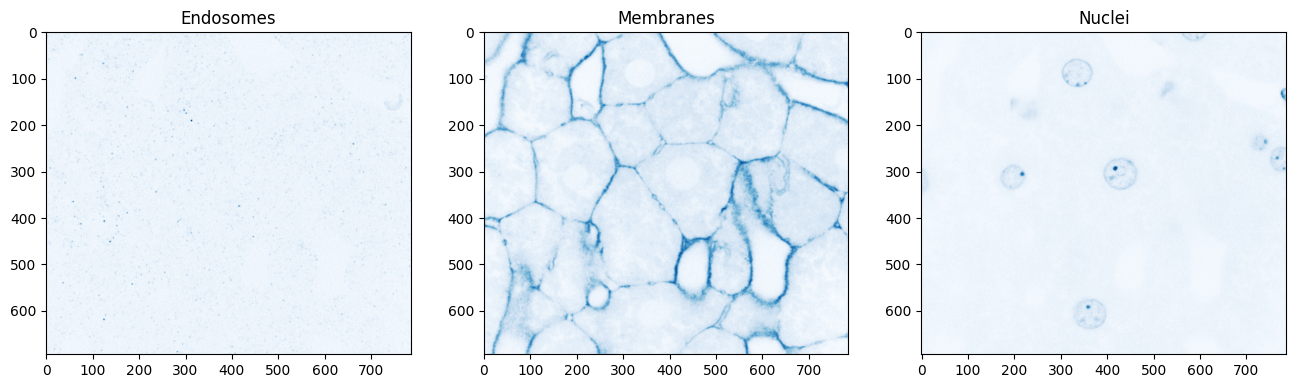

In [3]:
img = io.imread('2D_image_nuclei_cells_liver.tif')        # import image
print('Image dimension: ', img.shape)
print('Number of Channels: ', img.shape[2])
ChannelNames = ["Endosomes", "Membranes", "Nuclei"]  # list with channels' names

plt.figure(figsize=(16,8))

ch = 0
while ch < img.shape[2]:
    plt.subplot(1,3,ch+1)
    plt.title(ChannelNames[ch])
    plt.imshow(img[:,:,ch], cmap='Blues')       # create image object and visualise
    ch = ch +1


Let's have a closer look at one of the channels

Images are just numerical arrays
Image dimension:  (50, 50)
Data type :  uint8


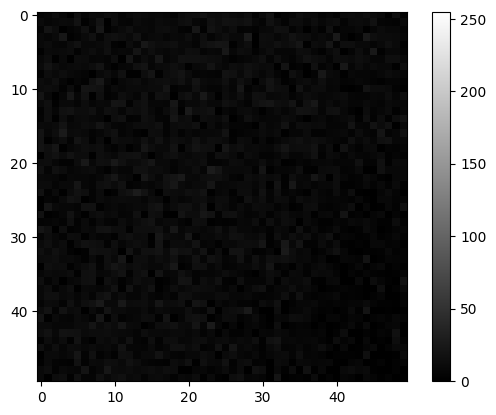

In [4]:
subimage = img[0:50,0:50,2]
print('Images are just numerical arrays')
print('Image dimension: ', subimage.shape)
print('Data type : ', subimage.dtype) # check the data type
plt.imshow(subimage, cmap='gray', vmin=0, vmax=255)
plt.colorbar();

Let's create an image with random (integers) intensity values between 0 and 255 (8 bit-depth)

A image is just a numerical array: 
 [[ 15 245  11  15 167  15  48 150  52 158]
 [129 133 187 214 145 148 113 142 131 244]
 [ 71  49 192  13 247  67 223  40  55  47]
 [215 149  48 156 230 166  80  66  87  36]
 [ 80  38  15  40 154  46  13 127  68  50]
 [ 80  81  30  90 131 240   2 125  14  35]
 [ 23 210 150 165   7 151 183 138  32  99]
 [157  57  83 193 222 208 196 114 155 248]
 [126 131  71 234  84  57 244 180 145 175]
 [ 59 144  15 105 114  67 139 235 245  91]]
The image is an :  <class 'numpy.ndarray'>
Data type :  uint8
Image with Random intensity values


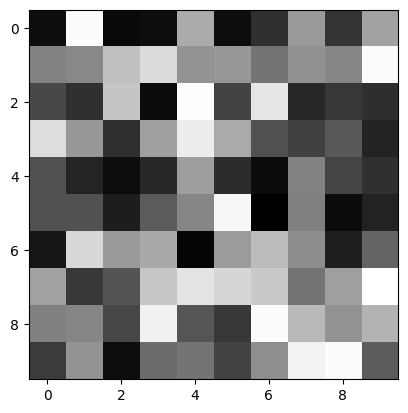

In [7]:
img2 = np.random.randint(0, 255, [10, 10], dtype='uint8')  # create random array of uint8
print('A image is just a numerical array: \n', img2)
np.save('randimg.npy', img2)  # save as binary .npy file

dataimg = np.load('randimg.npy')  # load .npy file
print('The image is an : ', type(dataimg))  # check imported data is a numpy array
print('Data type : ', dataimg.dtype)  # check the data type
plt.imshow(dataimg, interpolation="none", cmap='gray')  # visualise as image, interpolation=none shows actual pixels, cmap is the choice of color map
print('Image with Random intensity values')
plt.show()

#### Variable type

Python's and Numpy's standard data types include:

In [8]:
# numeric (int, float, complex, boolean),
b1 = 5.1 # float
b2 = 5 # int
b3 = 1<2 # boolean
print(b1, ' is',type(b1), '\n')
print(b2, ' is',type(b2), '\n')
print(b3, ' is',type(b3), '\n')

# lists
c = ['karin', 'sasaki', 345.453]
print(c, ' is', type(c), '\n')

# strings
print(c[0], ' is',type(c[0]), '\n')

# tuples
d = (123, 'john')
print(d, ' is', type(d), '\n')

# dictionaries
e = {'name': 'marcie','code':63214, 'dept': 'mathematics'}
print(e, ' is', type(e), '\n')

# Numpy array
f = np.array([1,2,3,4,5])
print(f, ' is', type(f), '\n')

# note this is different form the list
h = [1,2,3,4,5]
print(h, ' is', type(h), '\n')

5.1  is <class 'float'> 

5  is <class 'int'> 

True  is <class 'bool'> 

['karin', 'sasaki', 345.453]  is <class 'list'> 

karin  is <class 'str'> 

(123, 'john')  is <class 'tuple'> 

{'name': 'marcie', 'code': 63214, 'dept': 'mathematics'}  is <class 'dict'> 

[1 2 3 4 5]  is <class 'numpy.ndarray'> 

[1, 2, 3, 4, 5]  is <class 'list'> 



## 2. Image Brightness and Bit Depth


The brightness (or luminous brightness) of a digital image is a measure of relative intensity values across the pixel array after the image.



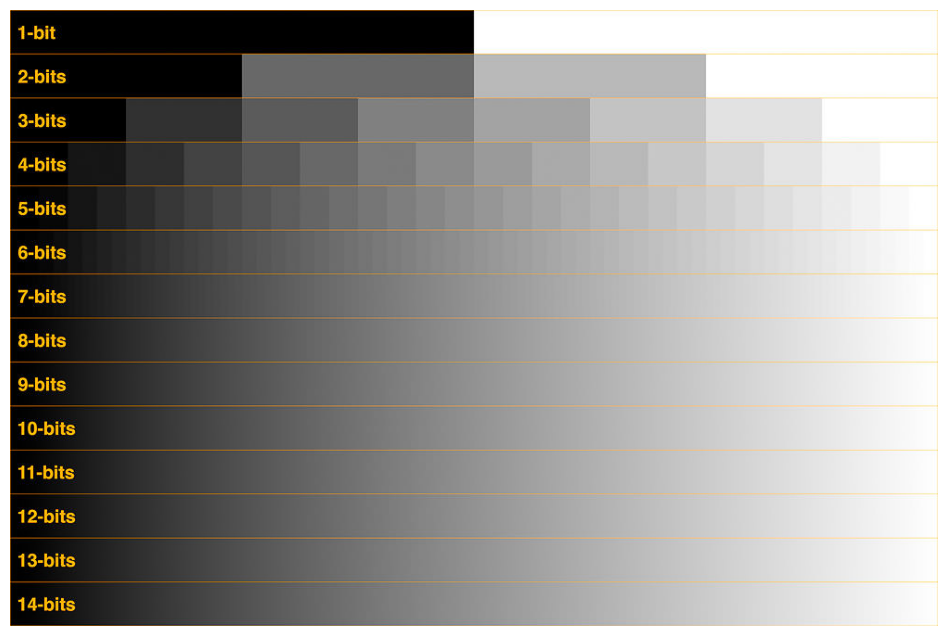

In [9]:
imgBitDepth = io.imread('graylevels.jpg')
plt.figure(figsize=(16,8))
plt.imshow(imgBitDepth)
plt.axis('off')
plt.show;

Check an image with different gray levels

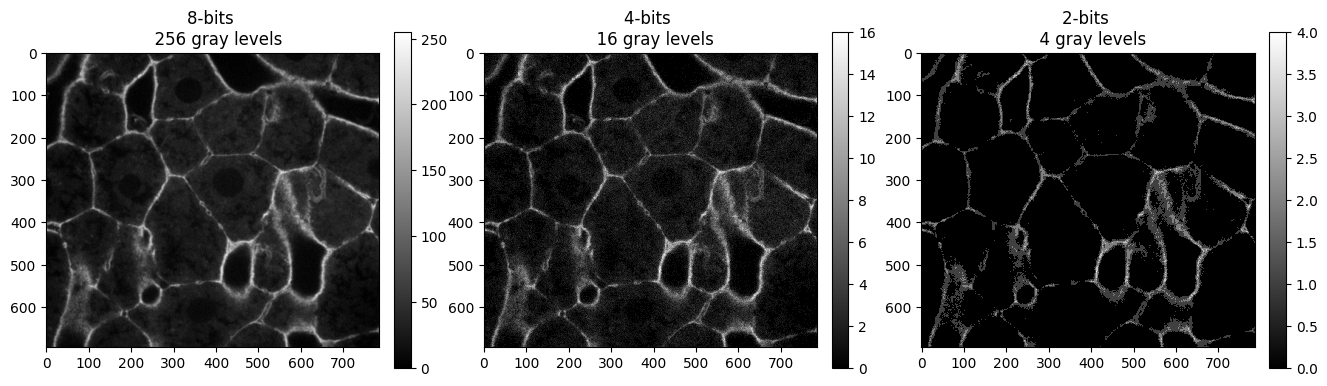

In [10]:
img8bit= img[:,:,1]

def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img


plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('8-bits \n  256 gray levels')
plt.imshow(img8bit, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

img4bit = convert(img8bit, 0, 16, np.uint8)
plt.subplot(1,3,2)
plt.title('4-bits \n  16 gray levels')
plt.imshow(img4bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

img2bit = convert(img8bit, 0, 4, np.uint8)
plt.subplot(1,3,3)
plt.title('2-bits \n  4 gray levels')
plt.imshow(img2bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

Same for an small inset

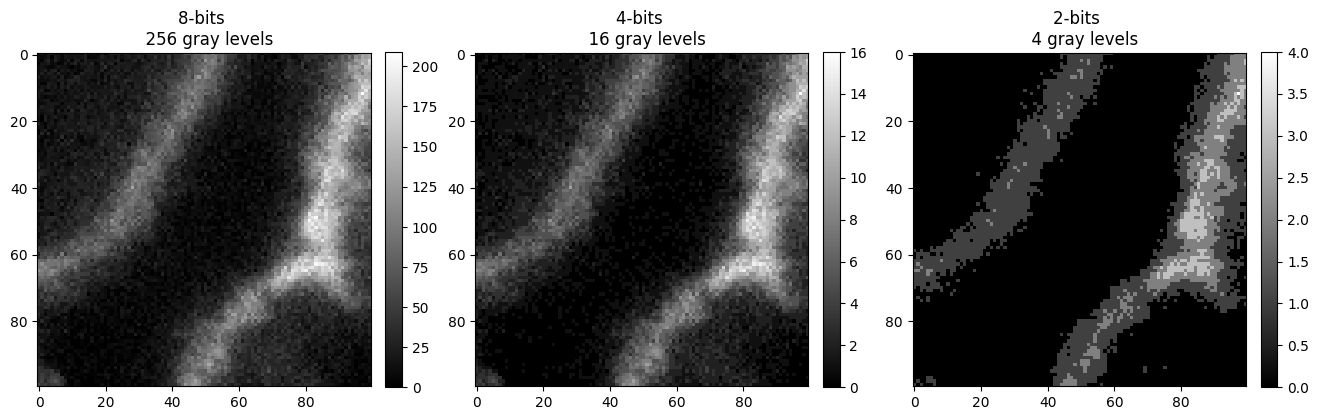

In [11]:
img8bit= img[0:100,0:100,1]

def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img


plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('8-bits \n  256 gray levels')
plt.imshow(img8bit, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

#img4bit=img8bit/16
img4bit = convert(img8bit, 0, 16, np.uint8)
plt.subplot(1,3,2)
plt.title('4-bits \n  16 gray levels')
plt.imshow(img4bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)


img2bit = convert(img8bit, 0, 4, np.uint8)
plt.subplot(1,3,3)
plt.title('2-bits \n  4 gray levels')
plt.imshow(img2bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

#### Color maps and look up tables (LUT)

- Lookup tables do the mapping from a numeric pixel value to a color.
- This is the main mechanism how we visualise microscopy image data.

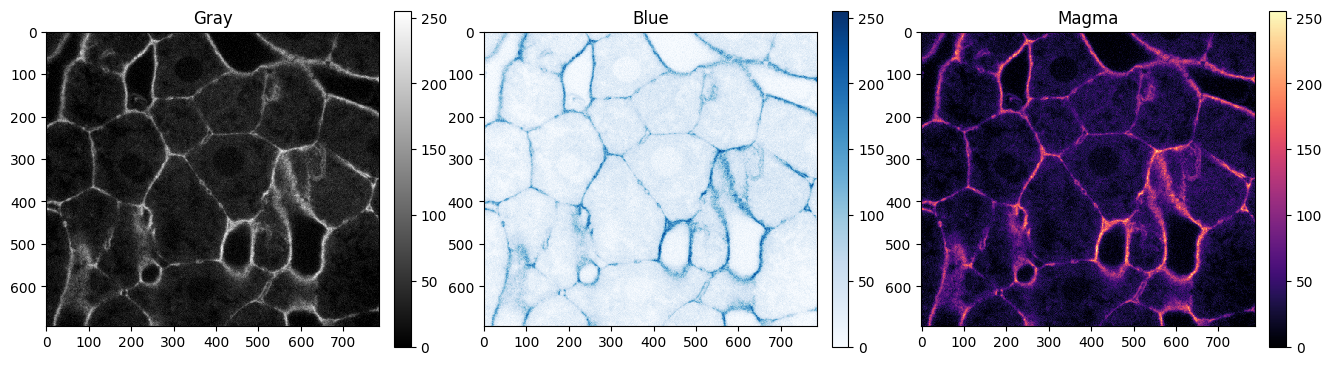

In [12]:
# visualise with different color map

plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('Gray')
plt.imshow(img[:,:,1],interpolation='none',cmap='gray')  # the color map is gray
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,3,2)
plt.title('Blue')
plt.imshow(img[:,:,1],interpolation='none',cmap='Blues') # the color map is blues
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,3,3)
plt.title('Magma')
plt.imshow(img[:,:,1],interpolation='none',cmap='magma') # the color map is blues
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()


## 3. Image arithmetic and unexpected errors

#### Adding an integer valua to an 8-bits image

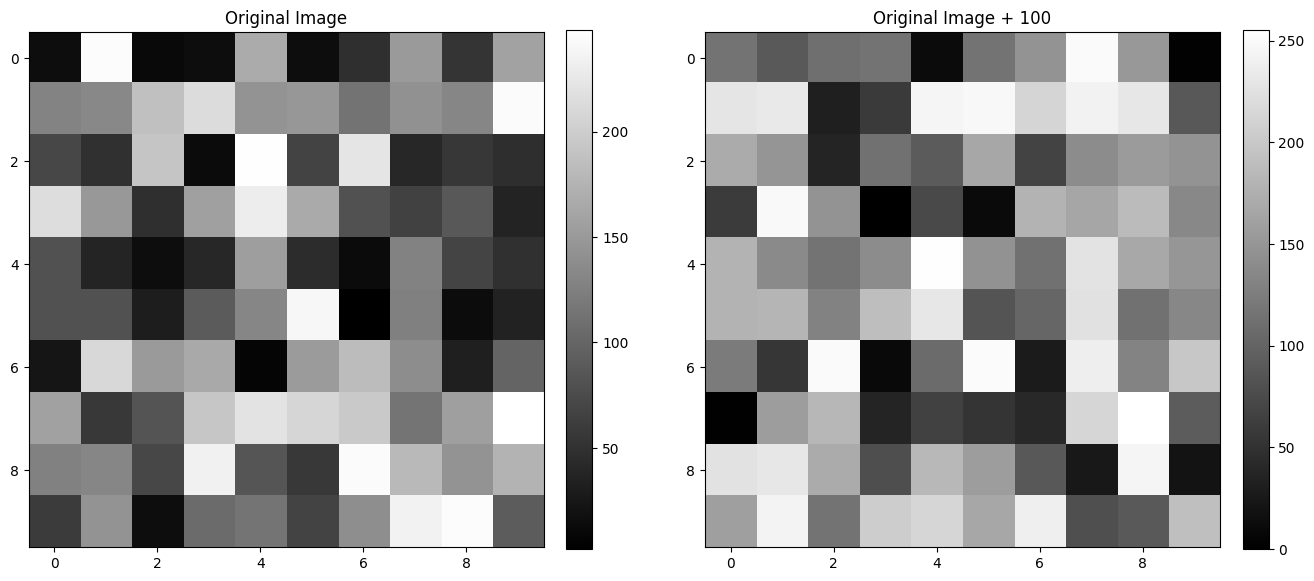

Values are calculated modulo 256


Arithmetics which loops around is called modulo arithmetic


[[ 15 245  11  15 167  15  48 150  52 158]
 [129 133 187 214 145 148 113 142 131 244]
 [ 71  49 192  13 247  67 223  40  55  47]
 [215 149  48 156 230 166  80  66  87  36]
 [ 80  38  15  40 154  46  13 127  68  50]
 [ 80  81  30  90 131 240   2 125  14  35]
 [ 23 210 150 165   7 151 183 138  32  99]
 [157  57  83 193 222 208 196 114 155 248]
 [126 131  71 234  84  57 244 180 145 175]
 [ 59 144  15 105 114  67 139 235 245  91]]


[[115  89 111 115  11 115 148 250 152   2]
 [229 233  31  58 245 248 213 242 231  88]
 [171 149  36 113  91 167  67 140 155 147]
 [ 59 249 148   0  74  10 180 166 187 136]
 [180 138 115 140 254 146 113 227 168 150]
 [180 181 130 190 231  84 102 225 114 135]
 [123  54 250   9 107 251  27 238 132 199]
 [  1 157 183  37  66  52  40 214 255  92]
 [226 231 171  78 184 157  88  24 245  19]
 [159 244 115 205 214 167 239  79  89 191]]




In [13]:
# Add integer value to an image

dataimgAdd = dataimg+100

# show results
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(dataimg,cmap="gray", interpolation='None')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(1,2,2)
plt.title('Original Image + 100')
data_plot = plt.imshow(dataimgAdd,cmap="gray", interpolation='None')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()


print('Values are calculated modulo 256')
print('\n')
print('Arithmetics which loops around is called modulo arithmetic')
print('\n')

print(dataimg)
print('\n')
print(dataimgAdd)
print('\n')


## 4. Getting some simple statistics

Let's calculate some simple statistics from the image intensities

#### Import and vizualize the image

In [15]:
img = io.imread('2D_image_nuclei_cells_liver.tif')        # import image
print('Image dimension: ', img.shape)
print('Number of Channels: ', img.shape[2])
print('Image type: ', img.dtype)
ChannelNames = ["Endosomes", "Membranes", "Nuclei"]  # list with channels' names



Image dimension:  (694, 786, 3)
Number of Channels:  3
Image type:  uint8


In [16]:
# plot the image channels using a defined function

def myplt(img, title):
    """This function displays the input image with interpolation='none' and cmap='magma'. """
    plt.imshow(img,interpolation='none',cmap='magma')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title(title)



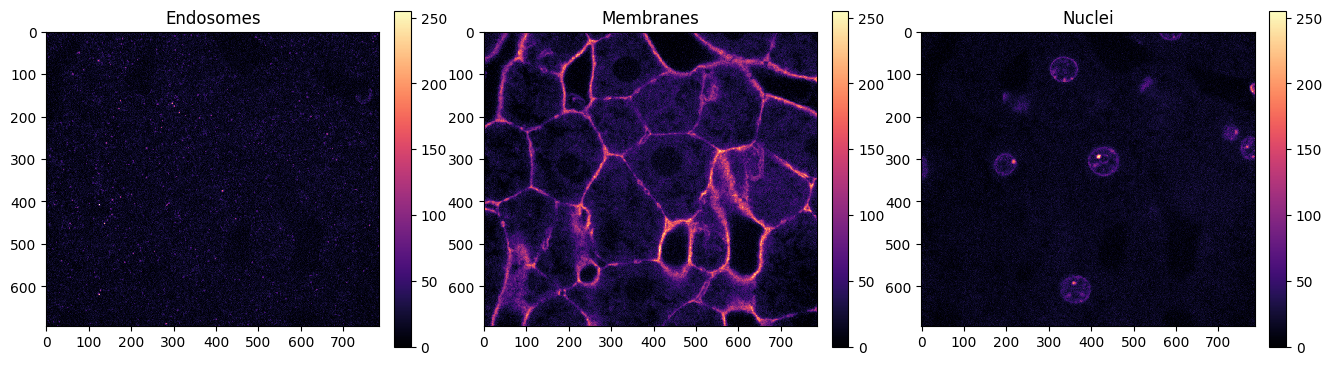

In [17]:
plt.figure(figsize=(16,8))
ch = 0
while ch < img.shape[-1]:
    plt.subplot(1,3,ch+1)
    myplt(img[:,:,ch], ChannelNames[ch])
    ch = ch +1


In [18]:
# Get each channel and get mean intensity values
Endosomes = img[:,:,0]
Membranes = img[:,:,1]
Nuclei = img[:,:,2]

mean_Endosomes = np.mean(Endosomes)
mean_Membranes = np.mean(Membranes)
mean_Nuclei = np.mean(Nuclei)

std_Endosomes = np.std(Endosomes)
std_Membranes = np.std(Membranes)
std_Nuclei = np.std(Nuclei)


In [19]:
# store results  in a dictionary
results = {'Structure':[], 'Mean intensity':[], 'Std intensity':[]}
results['Structure'] = ChannelNames
results['Mean intensity'] = [mean_Endosomes, mean_Membranes, mean_Nuclei]
results['Std intensity'] = [std_Endosomes, std_Membranes, std_Nuclei]

print(results)

{'Structure': ['Endosomes', 'Membranes', 'Nuclei'], 'Mean intensity': [np.float64(14.844616890687902), np.float64(37.03784528968769), np.float64(13.794960072156103)], 'Std intensity': [np.float64(9.220924008932009), np.float64(31.88791340538846), np.float64(9.928484912170934)]}


In [20]:
# save quantitative data to json file
import json
json.dump(results, open("results.txt", 'w'))

## 5. Image Filtering

- Removing noise and preserving the structures of interest.

- Genereal noised reduction (smoothing) using a `Gaussian filter`

- Gaussian Smoothing : Gaussian kernel is determined by the standard deviation ($\sigma$) of the Gaussian distribution
- $\sigma$ : large enough to blur out noise but small enough to keep structures of interest

Text(0.5, 1.0, 'Smoothed')

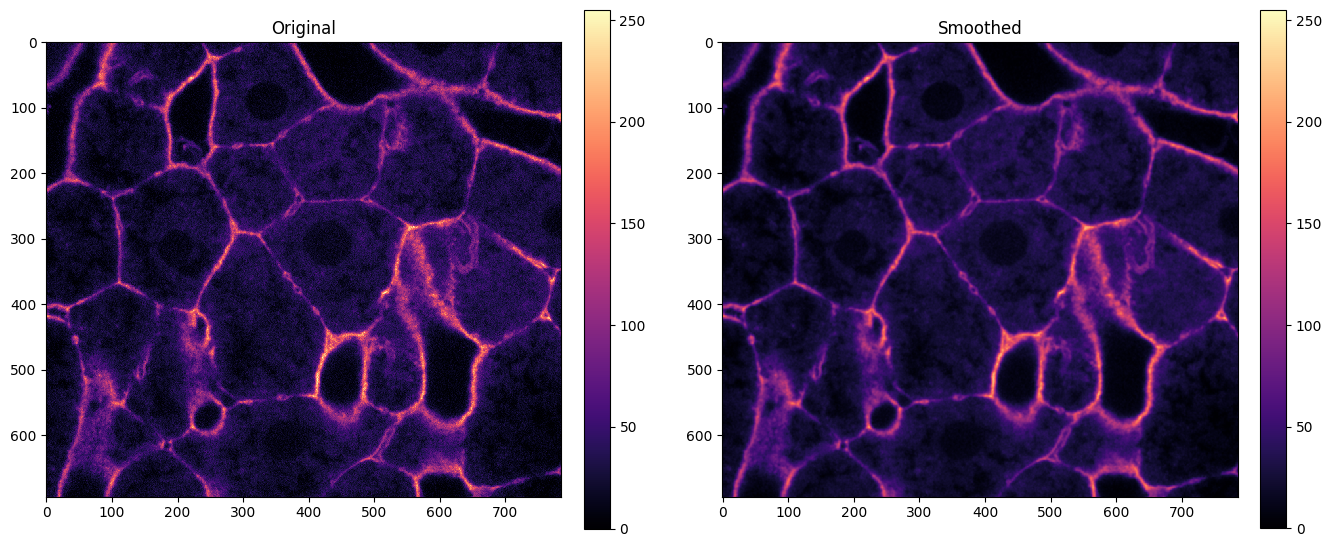

In [34]:
# The image processing package scipy.ndimage as ndi
import scipy.ndimage as ndi

sigma = 1.0 # standard deviation of the Gaussian filter

# gaussing filter
Membranes_smooth = ndi.gaussian_filter(Membranes, sigma)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(Membranes,interpolation='none',cmap='magma', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(Membranes_smooth,interpolation='none',cmap='magma', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Smoothed")

Text(0.5, 1.0, 'Smoothed')

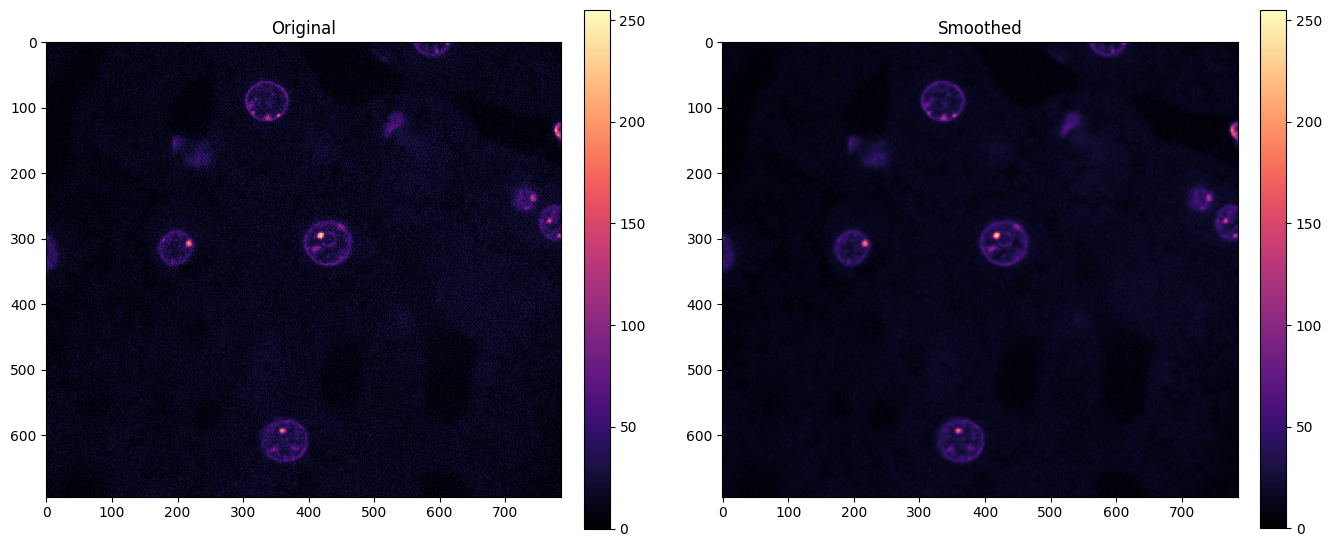

In [35]:
# gaussing filter
Nuclei_smooth = ndi.gaussian_filter(Nuclei, sigma)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(Nuclei,interpolation='none',cmap='magma', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(Nuclei_smooth,interpolation='none',cmap='magma', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Smoothed")

Text(0.5, 1.0, 'Smoothed')

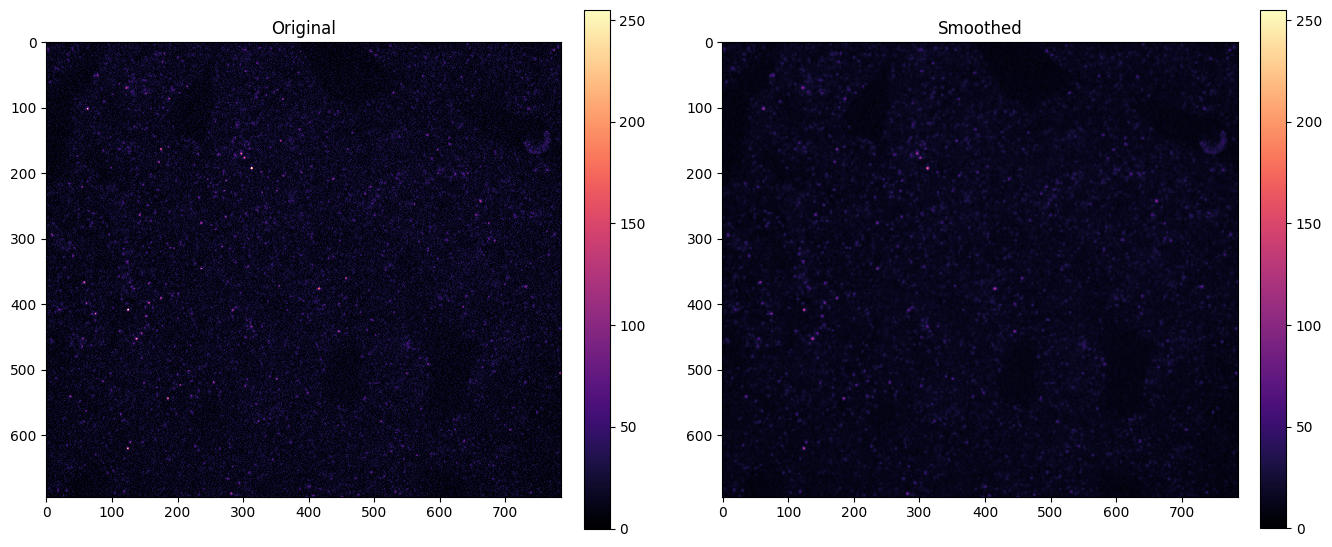

In [36]:
# gaussing filter
Endosomes_smooth = ndi.gaussian_filter(Endosomes, sigma)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(Endosomes,interpolation='none',cmap='magma', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(Endosomes_smooth,interpolation='none',cmap='magma', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Smoothed")